# Multiple Linear Regression



- when we have multiple factors for our prediction we can use this model  
- we shouldn't try to use this model for factors we cant see the line ourselves
    1. draw a scatter for the target and the factor
    2. check if there is a sudo-linear relation between them
    3. if there is no visional connection between them the model wont be good either
- dont use every possible factor that has nothing to do with the target to model otherwise you will over-fit your model
- how ever your Y should always be continuous but your Xs can be continuous or discrete(categorical)
    - for example genders or colors are discrete(categorical) and we can predict y based on them

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score

In [2]:
!wget -nc -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

File ‘FuelConsumption.csv’ already there; not retrieving.


### Reading the data in


In [5]:
df = pd.read_csv('./FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


select the fields that are related to our target (they are in its domain)

In [6]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


### check if the field has a linear connection to the target
- here we want to check for example EngineSize(one of the selected field) and Emission(the target)
- as you can see below there is almost a linear connection between them so we can use __Linear Regression__
- we could check other fields too but im not doing that here (since its already too messy)

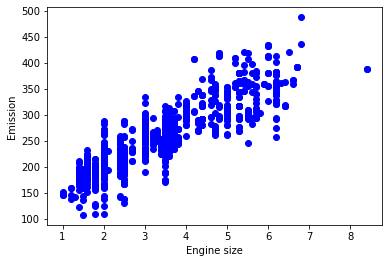

In [9]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

apparently there is a connection between ENGINESIZE and CO2EMISSIONS since its clearly a line,  
lets check it for CYLINDERS too, how ever im not going to check all of them to make things clear but we should only the one with similar results

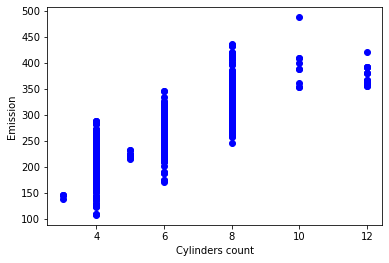

In [10]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Cylinders count")
plt.ylabel("Emission")
plt.show()

this one also has an linear relation too, so we can use it for Linear Regression

## lets split our data:
- $ \%{80} $ train
- $ \%{20} $ test

In [21]:
mask = np.random.rand(len(cdf)) < .8        
train = cdf[mask]
test = cdf[~mask]

### lets create our Model: 


In [47]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x, y)
print ('Coefficients: ', regr.coef_)

Coefficients:  [[9.83598604 7.90847832 9.70944784]]


### Time to Evaluate our Model:

In [49]:
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
y_hat = regr.predict(x)

score = r2_score(y, y_hat)

print('score = ', score)

score =  0.8715715893492595


### .87 is actually a pretty good score